In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# plt.style.use(['ieee','science','grid','no-latex'])

In [3]:
df = pd.read_csv('car_evaluation.csv',header = None)
labels = ['buying','maint','doors','persons','lug_boot','safety','target']
df.columns = labels
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Exploratory Data Analysis

In [4]:
df.shape

(1728, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,more,small,high,unacc
freq,432,432,432,576,576,576,1210


In [7]:
for col in df.columns:
    print(col,': ',*df[col].unique())

buying :  vhigh high med low
maint :  vhigh high med low
doors :  2 3 4 5more
persons :  2 4 more
lug_boot :  small med big
safety :  low med high
target :  unacc acc vgood good


**There are 6 features in the dataset and one target categorical variable. All the 6 features are categorical too**

## Missing Values?

In [8]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
target      object
dtype: object

In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

In [10]:
for col in df.columns:
    print(col,': ',*df[col].unique())

buying :  vhigh high med low
maint :  vhigh high med low
doors :  2 3 4 5more
persons :  2 4 more
lug_boot :  small med big
safety :  low med high
target :  unacc acc vgood good


No missing valuess, yaayy. lessgo

## Visualization

**1) Imbalanced Dataset**

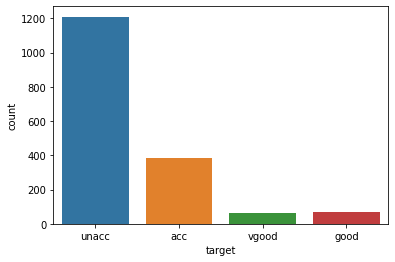

In [11]:
sns.countplot(data = df, x='target')
plt.grid(False)
plt.savefig('ImbalancedDataset')
plt.show()

In [12]:
print('Unacc: ',(df['target']=='unacc').sum())
print('Acc:   ',(df['target']=='acc').sum())
print('Good:  ',(df['target']=='good').sum())
print('VGood: ',(df['target']=='vgood').sum())

Unacc:  1210
Acc:    384
Good:   69
VGood:  65


The dataset seems imbalanced. We'll determine weights to adjust for the imbalances by learning from the dataset.

**2) Features**

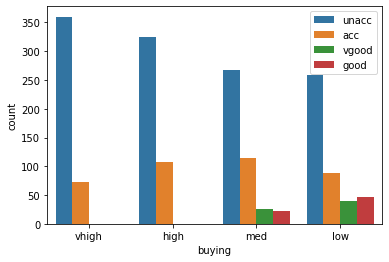

In [13]:
sns.countplot(data=df, x = 'buying',hue = 'target')
plt.grid(False)
plt.legend()
plt.savefig('Buying')
plt.show()

1) Most cars falls under unaccountable category.  
2) Cars that have high and vhigh buying prices are generally unaccountable while the low priced cars consists of all 4 categories

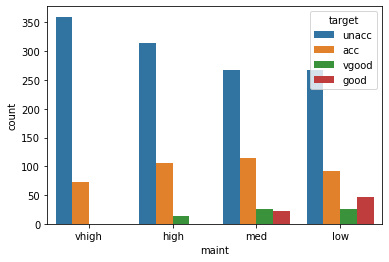

In [14]:
sns.countplot(data=df, x = 'maint',hue = 'target')
plt.grid(False)
plt.savefig('Maintenance')
plt.show()

- Cars with vhigh maintainence are unaccountable largely. No good and vgood cars are present with vhigh maintenance. 

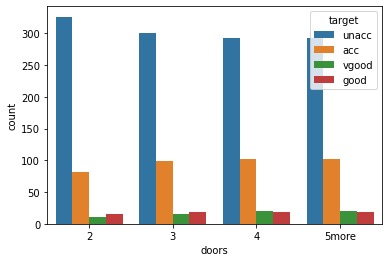

In [15]:
sns.countplot(data=df, x = 'doors',hue = 'target')
plt.grid(False)
plt.savefig('Doors')
plt.show()

- Almost all categories have similar distributions. Number of doors doesn't seem to be a crucial criteria that could distinguish.

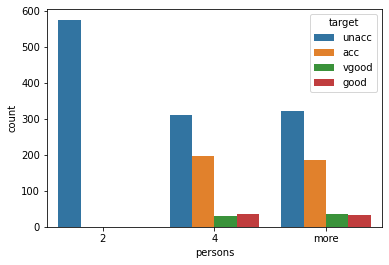

In [16]:
sns.countplot(data=df, x = 'persons',hue = 'target')
plt.grid(False)
plt.savefig('Persons')
plt.show()

- Cars that have only 2 person capacity are unaccountable. 
- 4 and 4 plus have similar reviews

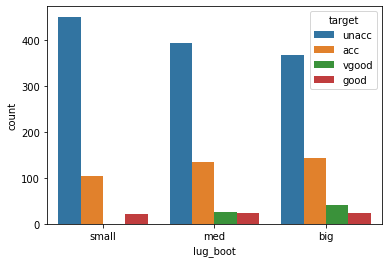

In [17]:
sns.countplot(data=df, x = 'lug_boot',hue = 'target')
plt.grid(False)
plt.savefig('lug_boot')
plt.show()

- Cars which have small lug_boot are never vgood. 
- There has been mixed reviews across cars which have medium to big luggage. However, a trend of bigger space and higher ratings are seen.

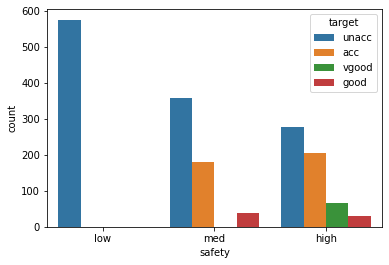

In [18]:
sns.countplot(data=df, x = 'safety',hue = 'target')
plt.grid(False)
plt.savefig('Safety')
plt.show()

Safety seems to play a major role. 
- Every car which have a estimated low safety are unaccountable.
- No cars are classified as vgood which have medium or low safety.
- A mixed reviews are seen across cars which were classified as high safety. 

## Feature Engineering and Data Split

In [19]:
d1 = {'vhigh':3,
     'high':2,
     'med':1,
     'low':0}

d2 = {'big':2,
     'med':1,
     'small':0}

d3 = {'high':2,
     'med':1,
     'low':0}

d4= {"unacc":0,
    "acc":1,
    "good":2,
    "vgood":3}

d5={"2":0,
    "4":1,
    "more":2}

d6={"2":0,
    "3":1,
    "4":2,
    "5more":3}

### Ordinal Encoding: 

The feature columns are categorical but is ordinal. Since they hold an order, we choose to do an Label Encoding instead of an One-hot Encoding. 

In [20]:
df['buying'] = df['buying'].map(d1)
df['maint'] = df['maint'].map(d1)
df['doors'] = df['doors'].map(d6)
df['persons'] = df['persons'].map(d5)
df['lug_boot'] = df['lug_boot'].map(d2)
df['safety'] = df['safety'].map(d3)
df['target'] = df['target'].map(d4)

In [21]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [22]:
# check the data types after transformation
df.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
target      int64
dtype: object

In [23]:
# checking for missing values once again
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('target',axis = 1)
y = df['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)
X_cval,X_test,y_cval,y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state = 42)

In [27]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace  = True)
X_cval.reset_index(drop = True, inplace  = True)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_cval = y_cval.values.reshape(-1,1)

In [28]:
X_train.shape, y_train.shape,  X_test.shape, y_test.shape, X_cval.shape, y_cval.shape

((1036, 6), (1036, 1), (346, 6), (346, 1), (346, 6), (346, 1))

In [29]:
X_trainfull = pd.concat([X_train,X_cval])
y_trainfull = np.concatenate((y_train,y_cval),axis= 0)

X_trainfull.reset_index(drop = True, inplace  = True)

## Decision Tree

### Unrestricted Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [31]:
# tree of unrestricted max depth 
# class weight balanced is used to address imbalanced dataset
clf_prelim = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42) # random_state to reproduce results
clf_prelim.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [32]:
## clearly overfits
print('Train Score: ',clf_prelim.score(X_train,y_train))
print('Test Score: ',round(clf_prelim.score(X_test,y_test),3))
print('Tree Depth: ', clf_prelim.get_depth())

Train Score:  1.0
Test Score:  0.968
Tree Depth:  12


The unrestricted tree is very deep and clearly overfits. With total of 6 features, the tree is very deep and hence we'll attempt to shorten it for better interpretability.

In [33]:
from sklearn.metrics import classification_report
tbl = classification_report(y_test, clf_prelim.predict(X_test),output_dict=True)
pd.DataFrame(tbl)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.991342,0.987500,0.650000,0.933333,0.968208,0.890544,0.974880
recall,0.991342,0.918605,1.000000,0.875000,0.968208,0.946237,0.968208
f1-score,0.991342,0.951807,0.787879,0.903226,0.968208,0.908563,0.969796
support,231.000000,86.000000,13.000000,16.000000,0.968208,346.000000,346.000000


Though the tree overfits, its performance on class 2 (aka good) isn't upto the mark. 

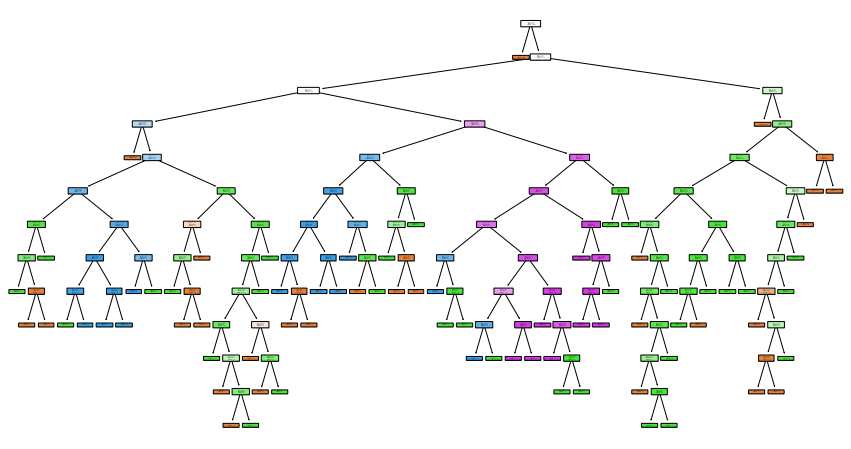

In [34]:
plt.figure(figsize = (15,8))
plot_tree(clf_prelim, rounded = True, filled = True)
# plt.savefig('tree')
plt.show()

This looks like a monster. The interpretability of this classifier is also difficult, especially if business decisions are to be sought after this model. 

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix

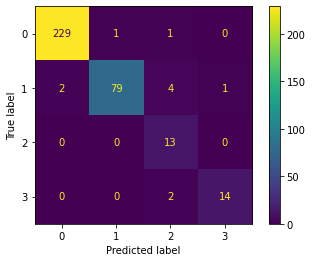

In [36]:
plot_confusion_matrix(clf_prelim,X_test,y_test)
plt.grid(False)
plt.show()

This tree is so deep that it could be overfitting. Even though it performs well for this data, it is unlikely that unless we prune it, it would underperform in other unseen data.Let's reduce the tree depth and analyse further.

### Restricted Trees

Heuristics Used. 

- Heuristic 1: Depth of tree should be comparable to number of features. Here, 10 is chosen. (change)
- Heuristic 2: Minimum number of samples required to split is kept at 20. 

## Depth of Tree

In [37]:
clf0_dts = [] 
max_depths = range(1,12)

for max_depth in max_depths:
    clf_dt = DecisionTreeClassifier(class_weight = 'balanced',
                                    min_samples_split = 20, 
                                    random_state = 42, max_depth = max_depth) 
    clf_dt.fit(X_train,y_train)
    clf0_dts.append(clf_dt)


        

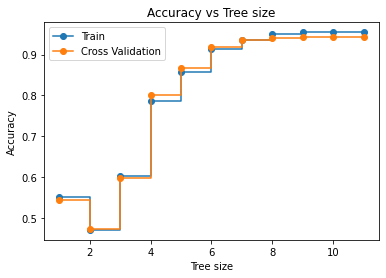

In [38]:
train0_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf0_dts]
cval0_scores = [clf_dt.score(X_cval,y_cval) for clf_dt in clf0_dts]

fig,ax = plt.subplots()
ax.set_xlabel('Tree size')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Tree size')
ax.plot(max_depths, train0_scores, marker = 'o', label='Train',drawstyle = 'steps-post')
ax.plot(max_depths, cval0_scores, marker = 'o', label='Cross Validation',drawstyle = 'steps-post')
ax.legend()
plt.savefig('clf0 accvstreesize')
plt.show()

Tree size beyond 7 doesn't show much improvement. We will stick with depth = 7 

In [39]:
# depth = 7 tree , trained on train+cval set
clf0 = DecisionTreeClassifier(class_weight = 'balanced',
                                    min_samples_split = 20, 
                                    random_state = 42, max_depth = 7)
clf0.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=20, random_state=42)

## Cost - Complexity Pruning

In [40]:
clf_ccp = DecisionTreeClassifier(class_weight = 'balanced', min_samples_split = 20, random_state = 42)
clf_ccp.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', min_samples_split=20,
                       random_state=42)

In [41]:
# Unpruned Tree
print('Cross Val: ',clf_ccp.score(X_cval,y_cval))
print('Train: ',clf_ccp.score(X_train,y_train))
print(clf_ccp.get_depth())

Cross Val:  0.9421965317919075
Train:  0.9546332046332047
9


In [42]:
path = clf_ccp.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas # extract different value of alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value of alpha

clf_dts = [] # array of decision trees

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(ccp_alpha = ccp_alpha, 
                                    class_weight = 'balanced',
                                    min_samples_split = 20, 
                                    random_state = 42) # train a dt on each alpha
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

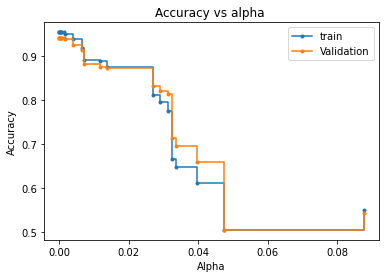

In [43]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
cval_scores = [clf_dt.score(X_cval,y_cval) for clf_dt in clf_dts]

fig,ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs alpha ')
ax.plot(ccp_alphas, train_scores, marker = '.', label='train',drawstyle = 'steps-post')
ax.plot(ccp_alphas, cval_scores, marker = '.', label='Validation',drawstyle = 'steps-post')
ax.legend()
plt.savefig('clf1 accvsalpha')
plt.show()


In [44]:
ideal_alpha = ccp_alphas[0]
min_score = cval_scores[0] 

for i in range(len(cval_scores)):
    if cval_scores[i]>=min_score:
        min_score = cval_scores[i]
        ideal_alpha = ccp_alphas[i]


In [45]:
print('Optimal Value for alpha is: ',ideal_alpha)

Optimal Value for alpha is:  0.001297243632504926


In [46]:
clf1 = DecisionTreeClassifier(ccp_alpha = ideal_alpha, 
                                    class_weight = 'balanced',
                                    min_samples_split = 20, 
                                    random_state = 42)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001297243632504926, class_weight='balanced',
                       min_samples_split=20, random_state=42)

In [47]:
# After Pruning
print('Tree Depth: ', clf1.get_depth())

Tree Depth:  9


In [48]:
from sklearn.model_selection import cross_val_score

## Bagged Trees

In this, we'll attempt to bag 200 unpruned overfit trees (without random feature selection) and try if that increases accuracy

In [49]:
class BaggedTrees:
    def __init__(self,B,fraction,min_samples_split = 20, random_state = None, class_weight = 'balanced'):
        self.fraction = fraction
        self.B = B
        self.min_samples_split = min_samples_split 
        self.random_state = random_state
        self.class_weight = class_weight 
    
    def fit(self,df_trainfull):
        from sklearn.utils import resample #for bootstrap
        self.bag = list() 
        n_size = int(len(df_trainfull) * self.fraction)
        
        for i in range(self.B):

            #prepare train & test sets
            train = resample(df_trainfull, n_samples = n_size) #Sampling with replacement
            train.reset_index(drop = True, inplace = True)

            #fit model
            model = DecisionTreeClassifier(class_weight = self.class_weight,min_samples_split = self.min_samples_split,
                                          random_state = self.random_state)
            model.fit(train.drop('target',axis = 1), train['target']) 
            self.bag.append(model)  
        
        
    def predict(self,X):
        pred = []
        for clf in self.bag:
            pred.append(clf.predict(X))
        from scipy import stats 
        res = stats.mode(pred,axis = 0)[0]
        res = res.reshape(-1,1)
        return res
    
    def score(self,X,y):
        from sklearn.metrics import accuracy_score

        return accuracy_score(y, self.predict(X))
                
    def returnbag(self):
        return self.bag
        

In [50]:
df_trainfull = X_train.copy()
df_trainfull['target'] = y_train

In [51]:
B = 200 # Number of Bootstraps 
fraction = 0.5 #Size of sample, picking only 50% of the given data in every bootstrap sample

In [52]:
clf2 = BaggedTrees(B,fraction)
clf2.fit(df_trainfull)

## Model Evaluation

In [53]:
print(clf0.score(X_cval,y_cval))
print(clf1.score(X_cval,y_cval))
print(clf2.score(X_cval,y_cval))

0.9364161849710982
0.9421965317919075
0.9132947976878613


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [55]:
from sklearn.metrics import classification_report
tbl0 = classification_report(y_cval, clf0.predict(X_cval),output_dict=True)
tbl1 = classification_report(y_cval, clf1.predict(X_cval),output_dict=True)
tbl2 = classification_report(y_cval, clf2.predict(X_cval),output_dict=True)

In [56]:
pd.DataFrame(tbl0)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.995868,0.878788,0.636364,0.687500,0.936416,0.799630,0.945753
recall,0.967871,0.828571,0.875000,1.000000,0.936416,0.917861,0.936416
f1-score,0.981670,0.852941,0.736842,0.814815,0.936416,0.846567,0.939000
support,249.000000,70.000000,16.000000,11.000000,0.936416,346.000000,346.000000


In [57]:
pd.DataFrame(tbl1)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.995885,0.893939,0.666667,0.687500,0.942197,0.810998,0.950232
recall,0.971888,0.842857,0.875000,1.000000,0.942197,0.922436,0.942197
f1-score,0.983740,0.867647,0.756757,0.814815,0.942197,0.855740,0.944386
support,249.000000,70.000000,16.000000,11.000000,0.942197,346.000000,346.000000


In [58]:
pd.DataFrame(tbl2)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,1.000000,0.797297,0.705882,0.52381,0.913295,0.756747,0.930251
recall,0.939759,0.842857,0.750000,1.00000,0.913295,0.883154,0.913295
f1-score,0.968944,0.819444,0.727273,0.68750,0.913295,0.800790,0.918575
support,249.000000,70.000000,16.000000,11.00000,0.913295,346.000000,346.000000


Pruned Tree performs the best!!

## Best Tree

In [59]:
clf_best = clf1
clf_best.fit(X_trainfull,y_trainfull)

DecisionTreeClassifier(ccp_alpha=0.001297243632504926, class_weight='balanced',
                       min_samples_split=20, random_state=42)

## Model Evaluation

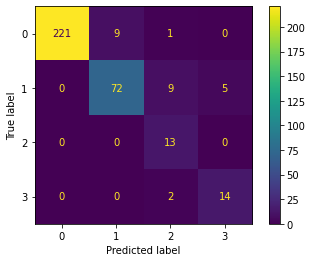

In [60]:
plot_confusion_matrix(clf_best,X_test,y_test)
plt.grid(False)
plt.savefig('clf_best_cm')
plt.show()

In [61]:
tbl_best = classification_report(y_test, clf_best.predict(X_test),output_dict=True)
pd.DataFrame(tbl_best)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,1.000000,0.888889,0.520000,0.736842,0.924855,0.786433,0.942179
recall,0.956710,0.837209,1.000000,0.875000,0.924855,0.917230,0.924855
f1-score,0.977876,0.862275,0.684211,0.800000,0.924855,0.831091,0.929884
support,231.000000,86.000000,13.000000,16.000000,0.924855,346.000000,346.000000


In [62]:
feature_imp = pd.Series(clf_best.feature_importances_,index=X_trainfull.columns).sort_values(ascending=False)
feature_imp

safety      0.281104
maint       0.194874
lug_boot    0.175699
buying      0.168949
persons     0.142362
doors       0.037012
dtype: float64

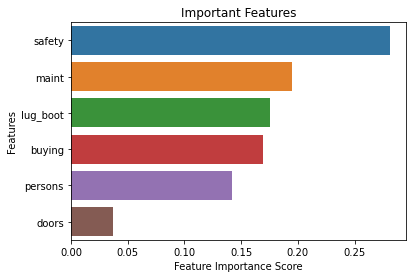

In [64]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.grid(False)
plt.savefig('feature_imp')
plt.show()

Agrees with our countplot intuition

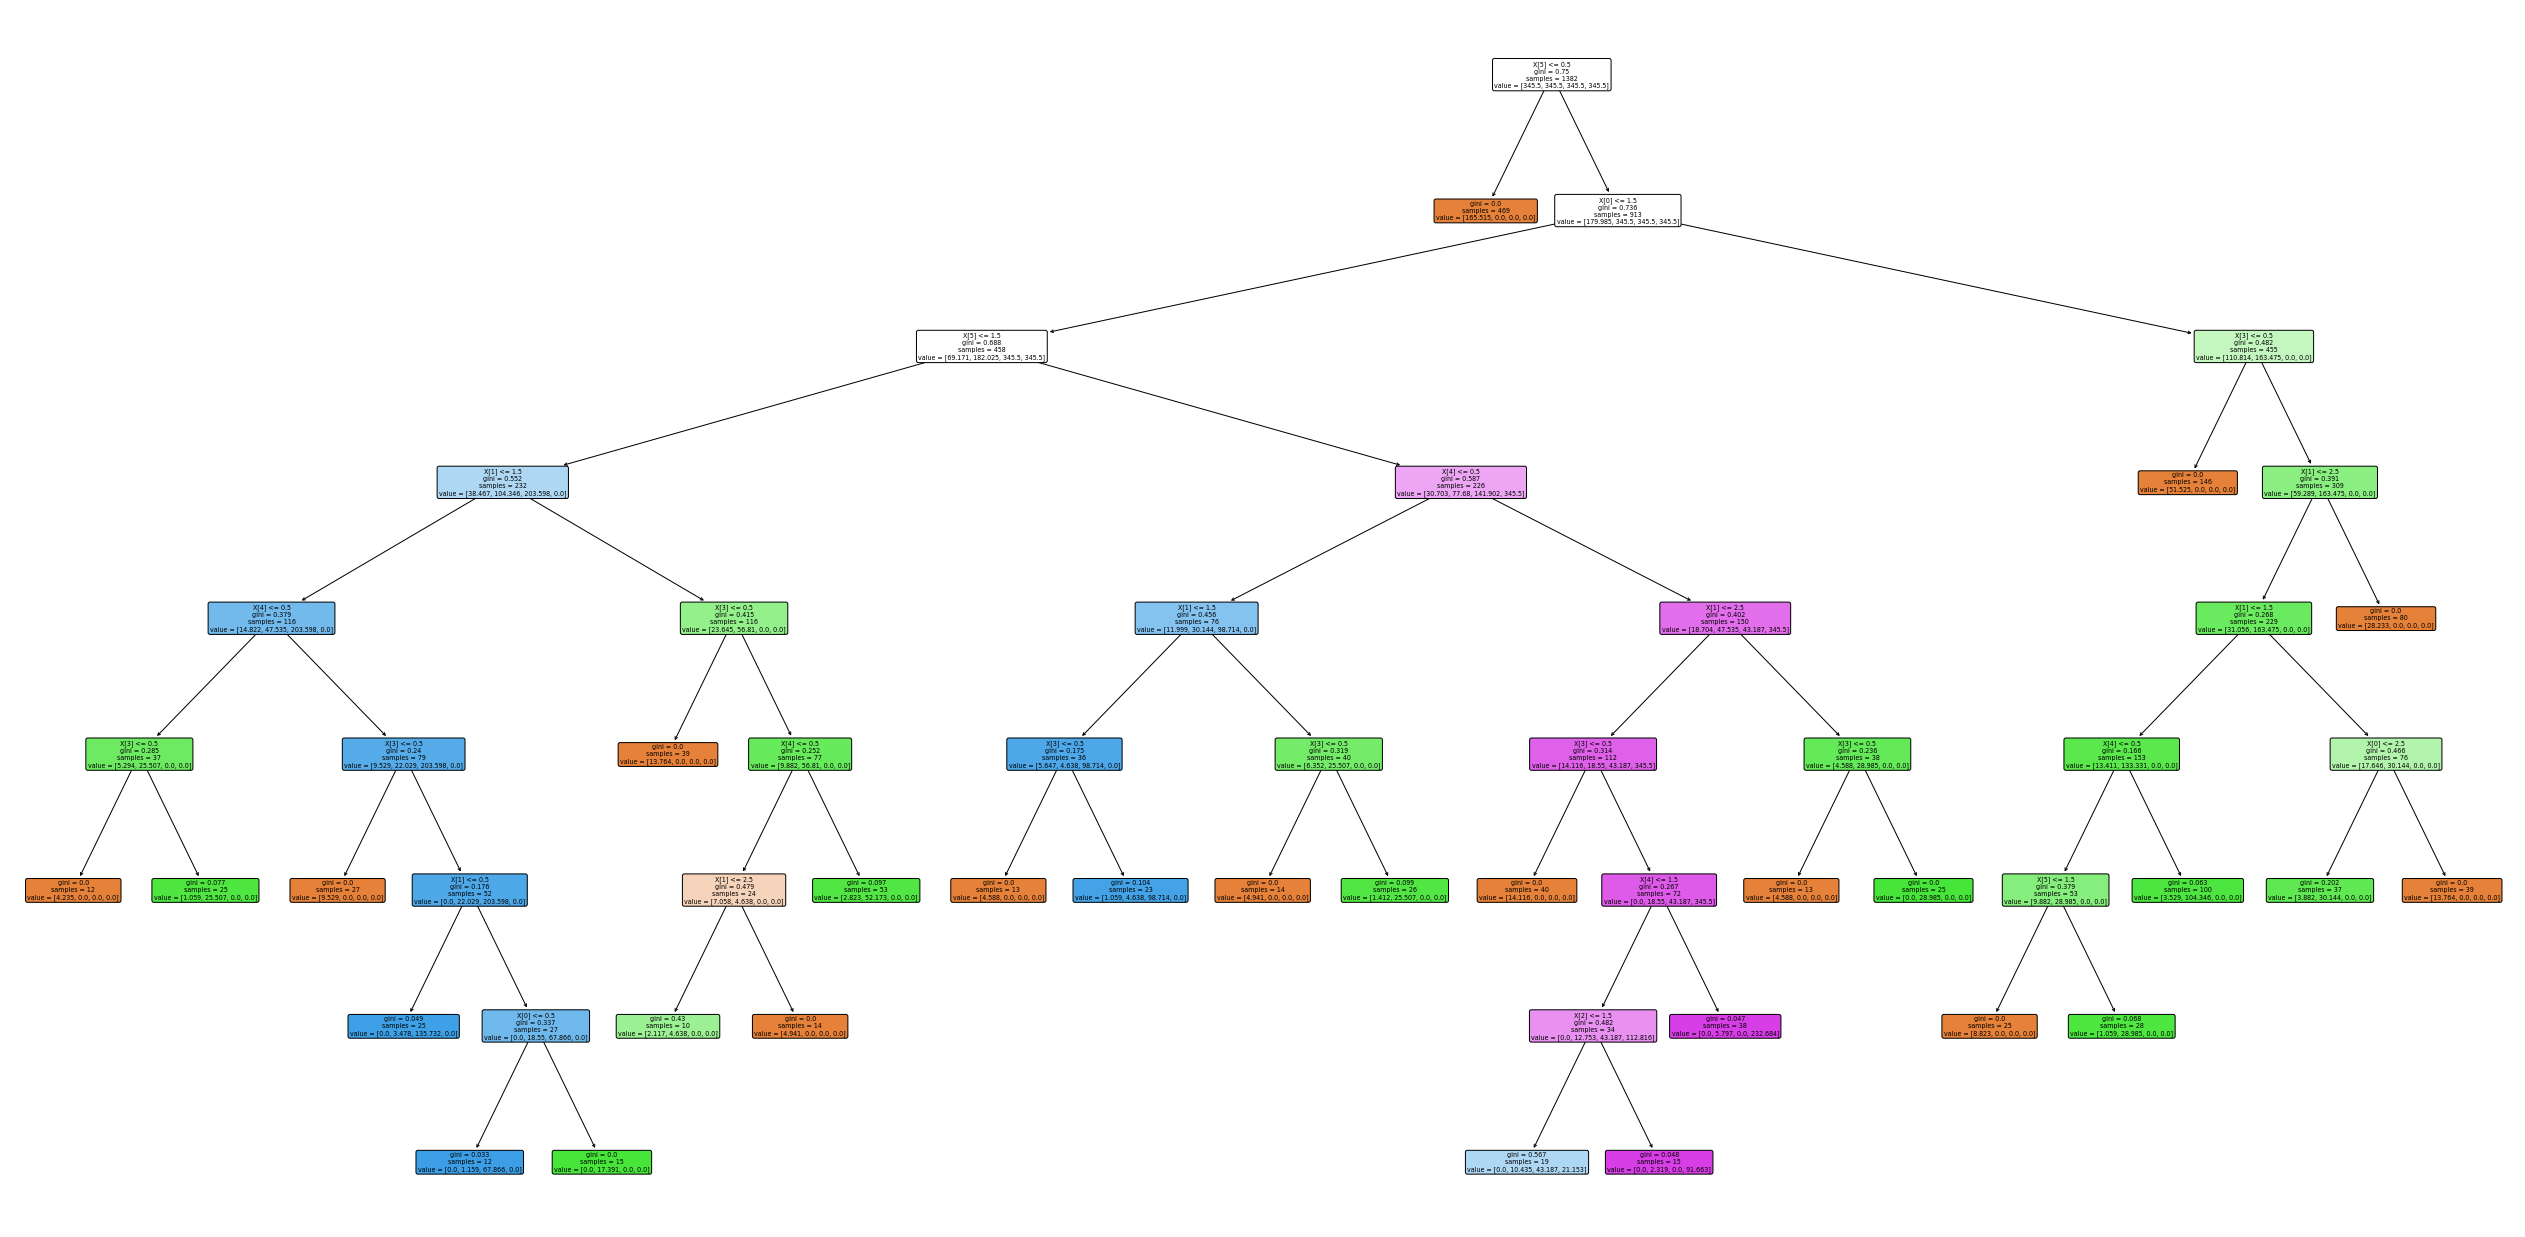

In [65]:
plt.figure(figsize = (45,22.5))
plot_tree(clf_best, rounded = True, filled = True)
# plt.savefig('tree')
plt.show()

In [66]:
import graphviz # graphviz takes description of graphs and data and constructs diagrams based off of that information
from sklearn import tree
dot_data = tree.export_graphviz(clf_best,
                              feature_names=X_test.columns, out_file = None)
graph = graphviz.Source(dot_data) 
# graph.render('iris')